import dependencies

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f'Package versions: \n')

print(f'numpy {np.__version__}')
print(f'scipy {scipy.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
print(f'scikit-learn {sklearn.__version__}')

# Notebook tested on: 
# numpy 1.22.2
# scipy 1.7.1
# pandas 1.3.4
# seaborn 0.11.2
# scikit-learn 0.24.2

Package versions: 

numpy 1.23.4
scipy 1.9.3
pandas 1.5.1
seaborn 0.12.1
scikit-learn 1.1.3


In [2]:
# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Make noise after finish executing cell

#method 1
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)

# Audio(audio_data, rate=framerate, autoplay=True)

#method 2
import winsound
# winsound.MessageBeep()

import data

In [4]:
df1 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_1_parquetnew.parquet')
df2 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_2_parquetnew.parquet')
df3 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_3_parquetnew.parquet')

In [5]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [6]:
df.head().T

index,4,8,13,14,16
race_ethnicity_combined,NA,"Black, Non-Hispanic",NA,NA,NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case
cdc_case_earliest_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,2020-10-30 00:00:00,2020-10-30 00:00:00,2020-05-29 00:00:00
cdc_report_dt,2020-07-13 00:00:00,2020-07-04 00:00:00,2020-10-30 00:00:00,2021-02-03 00:00:00,2020-05-29 00:00:00
sex,Male,Male,Male,Male,Male
onset_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,NaT,NaT,NaT
pos_spec_dt,None,None,2020-10-30,2020-10-30,2020-05-29
hosp_yn,No,No,No,No,No
icu_yn,Unknown,No,Missing,Missing,Missing
death_yn,Unknown,Unknown,Missing,No,Missing


In [7]:
df.shape

(1515261, 32)

drop datetime data

In [9]:
datetime_features = ['cdc_report_dt',
                    'cdc_case_earliest_dt',
                    'onset_dt',
                    'pos_spec_dt']

In [10]:
df = df.drop(datetime_features, axis=1)

train test split

In [11]:
X = df[df.columns[df.columns != 'pna_yn']]
y = df['pna_yn']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# EDA

**Bivariate analysis notes:**    
Two categoriacal variables (https://online.stat.psu.edu/stat100/lesson/5)
- bar graph of percents by groups
- table

In [42]:
def univariate_pie(label, explode):
    proportion = X_train[f'{label}'].value_counts(normalize=True)
    
    fig, ax = plt.subplots()
    ax.set_title(f'Pie Chart for {label}')
    ax.axis('equal')
    plt.pie(x=proportion,
            labels=proportion.index,
            explode=explode,
            autopct='%.1f%%',
            startangle=45)
    plt.savefig(f'Univariate {label} Pie Chart')
    plt.show
    
def bivariate_crosstab(label):
    df_label_bivariate = pd.concat([y_train, X_train[f'{label}']],axis=1)

    ct = pd.crosstab(df_label_bivariate[f'{label}'],
                      df_label_bivariate['pna_yn'],
                      margins=True)     
    return ct


def bivariate_countplot(label):
    fig, ax = plt.subplots()

    sns.countplot(data=X_train, x=f'{label}',
                 hue=y_train)

    ax.set_title(f'Barplot for Pneumonia based on Patients\' {label.replace("_", " ").capitalize()}')
#     plt.xticks(rotation=-45)
    plt.xlabel(f'{label.replace("_", " ").capitalize()}')
    plt.ylabel('Frequency')
    plt.savefig(f'Bivariate {label.replace("_", " ").capitalize()} Frequency')
    plt.show
    
def yn_eda(label, explode):
    
    #univariate piechart
    univariate_pie(f'{label}', explode=explode)
    
    #crosstab
    ct = bivariate_crosstab(f'{label}')
    
    #bivariate countplot
    bivariate_countplot(f'{label}')
    
    return ct

pna_yn,No,Yes,All
hosp_yn,,,
Missing,12756,709,13465
No,871432,16243,887675
Unknown,21949,1359,23308
Yes,41478,49298,90776
All,947615,67609,1015224


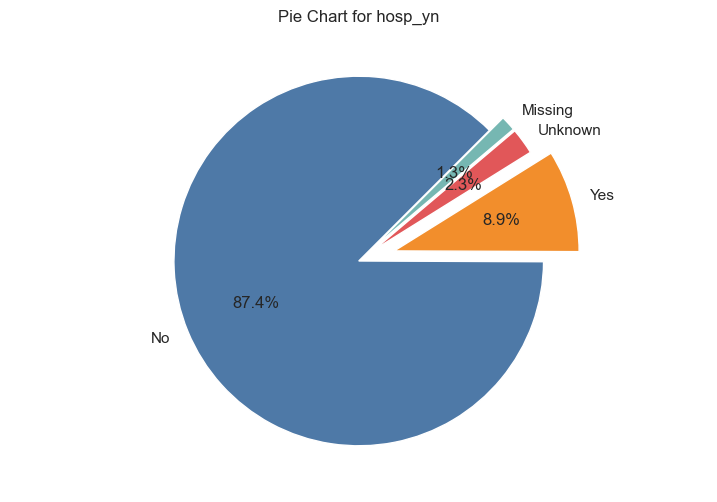

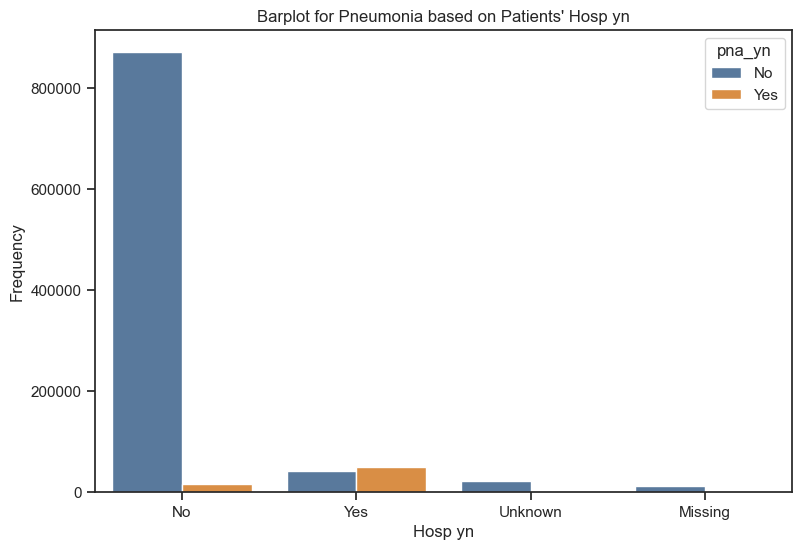

In [43]:
yn_eda('hosp_yn', explode=(0, 0.2, 0.1, 0.1))

## Target class: pna_yn

In [12]:
n = y_train.shape[0]

In [13]:
y_train_percentage = y_train.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

In [14]:
y_train

y_train = y_train.str.strip()
y_train

index
5501995     No
647884      No
1047396     No
4822310     No
3603227     No
          ... 
2350029    Yes
4722733     No
1129171    Yes
6427660     No
1048704     No
Name: pna_yn, Length: 1015224, dtype: object

In [15]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,pna_yn,race_ethnicity_combined,current_status,sex,hosp_yn,icu_yn,death_yn,hc_work_yn,abxchest_yn,acuterespdistress_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
index,,,,,,,,,,,,,,,,,,,,,
5501995,No,"White, Non-Hispanic",Laboratory-confirmed case,Female,No,Missing,Missing,No,Missing,No,...,No,No,Yes,No,No,Yes,05119,PULASKI,AR,60 - 69 Years
647884,No,"White, Non-Hispanic",Laboratory-confirmed case,Female,No,Missing,No,No,Missing,No,...,No,Yes,No,No,Yes,Yes,05119,PULASKI,AR,30 - 39 Years
1047396,No,Unknown,Laboratory-confirmed case,Female,No,No,No,No,Missing,No,...,No,No,No,No,No,No,42029,CHESTER,PA,20 - 29 Years
4822310,No,Unknown,Laboratory-confirmed case,Female,Yes,No,No,NA,Missing,No,...,Yes,No,Yes,No,Yes,Yes,05029,CONWAY,AR,50 - 59 Years
3603227,No,Unknown,Probable Case,Female,No,Unknown,No,No,Unknown,No,...,No,No,Yes,Missing,Yes,Yes,37197,YADKIN,NC,50 - 59 Years


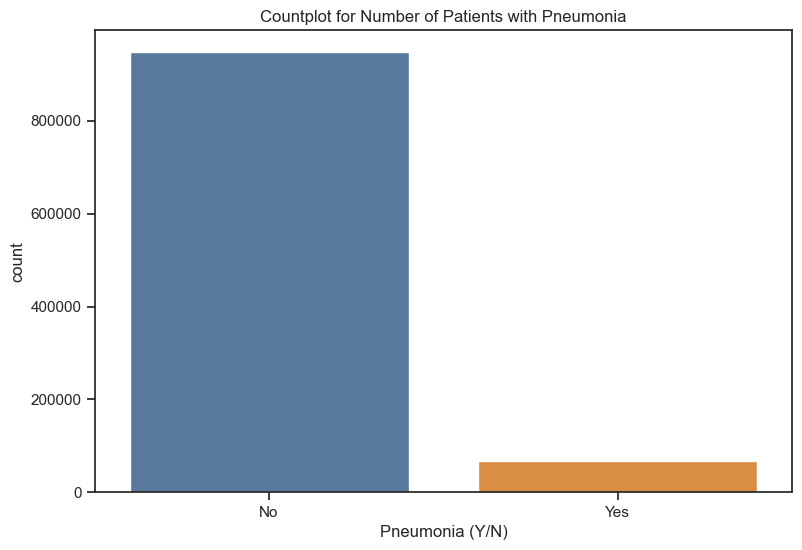

In [16]:
fig, ax = plt.subplots()
sns.countplot(data=train, x='pna_yn', ax=ax)
ax.set_title('Countplot for Number of Patients with Pneumonia')
# ax.set_xticklabels(['No', 'Yes'])
plt.xlabel('Pneumonia (Y/N)')
plt.savefig(f'Pneumonia Countplot')
plt.show()

Of {{n}} observations, only {{y_train_percentage[1]}} of patients presented with pneumonia. Need to take into consideration the different COVID-19 variants when considering the risk of pneumonia, especially for America where the data is collected from. Also need to consider COVID-19 vaccine dose administered as it leads to less pneumonia <sup>1</sup>. For example, the Omicron variant, which spread since  December 2021, rarely causes pneumonia <sup>2</sup>.

1. https://pubs.rsna.org/doi/10.1148/radiol.220129#:~:text=The%20answer%3A%20pneumonia%20was%20present,for%20the%20difference%20between%20groups).
2. https://www.google.com/search?q=risk+of+pneumonia+for+omnicrom&oq=risk+of+pneumonia+for+omnicrom&aqs=chrome..69i57j33i10i160l2.3711j0j7&sourceid=chrome&ie=UTF-8

## Race & ethnicity combined
### Univarite

In [17]:
X_train['race_ethnicity_combined'].value_counts(normalize=True)

White, Non-Hispanic                                     0.496646
Unknown                                                 0.167475
Hispanic/Latino                                         0.162740
Black, Non-Hispanic                                     0.092945
NA                                                      0.029253
Multiple/Other, Non-Hispanic                            0.022760
Asian, Non-Hispanic                                     0.018091
Native Hawaiian/Other Pacific Islander, Non-Hispanic    0.004447
American Indian/Alaska Native, Non-Hispanic             0.003841
Missing                                                 0.001802
Name: race_ethnicity_combined, dtype: float64

Combine Unknown, NA and Missing values into 'Unknown' class

In [18]:
X_train = X_train.apply(lambda x: x.replace('Missing', 'Unknown'))
X_train = X_train.apply(lambda x: x.replace('NA', 'Unknown'))
X_train = X_train.fillna('Unknown')

In [19]:
race_ethnicity_combined_proportion = X_train['race_ethnicity_combined'].value_counts(normalize=True)
race_ethnicity_combined_proportion.keys()

Index(['White, Non-Hispanic', 'Unknown', 'Hispanic/Latino',
       'Black, Non-Hispanic', 'Multiple/Other, Non-Hispanic ',
       'Asian, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic'],
      dtype='object')

In [20]:
len(X_train['race_ethnicity_combined'].value_counts(normalize=True))

8

Pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

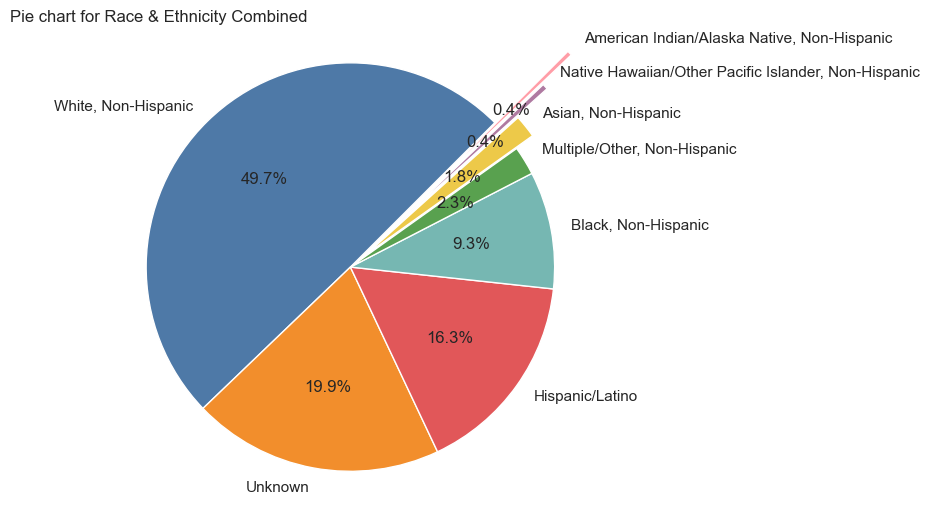

In [21]:
fig, ax= plt.subplots()
ax.set_title('Pie chart for Race & Ethnicity Combined', loc='left')
plt.pie(x=race_ethnicity_combined_proportion,
        labels=race_ethnicity_combined_proportion.keys(),
        explode=(0, 0, 0, 0, 0, 0.1, 0.3, 0.5),
        autopct='%.1f%%',
        startangle=45)
ax.axis('equal')
plt.savefig(f'Race & Ethnicity Pie Chart')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

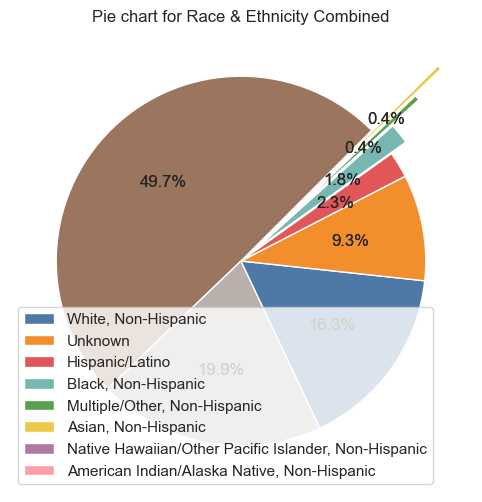

In [22]:
fig, ax0= plt.subplots()
ax0.set_title('Pie chart for Race & Ethnicity Combined')
ax0.pie(x=race_ethnicity_combined_proportion,
        startangle=45,
        explode=(0, 0, 0, 0, 0, 0.1, 0.3, 0.5),
        autopct='%.1f%%')

patches, texts, auto = ax0.pie(race_ethnicity_combined_proportion,
                               startangle=45,
                               explode=(0, 0, 0, 0, 0, 0.1, 0.3, 0.5),
                               autopct='%.1f%%')

plt.legend(patches, labels=race_ethnicity_combined_proportion.keys(), loc='best')
plt.show

Donut chart

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

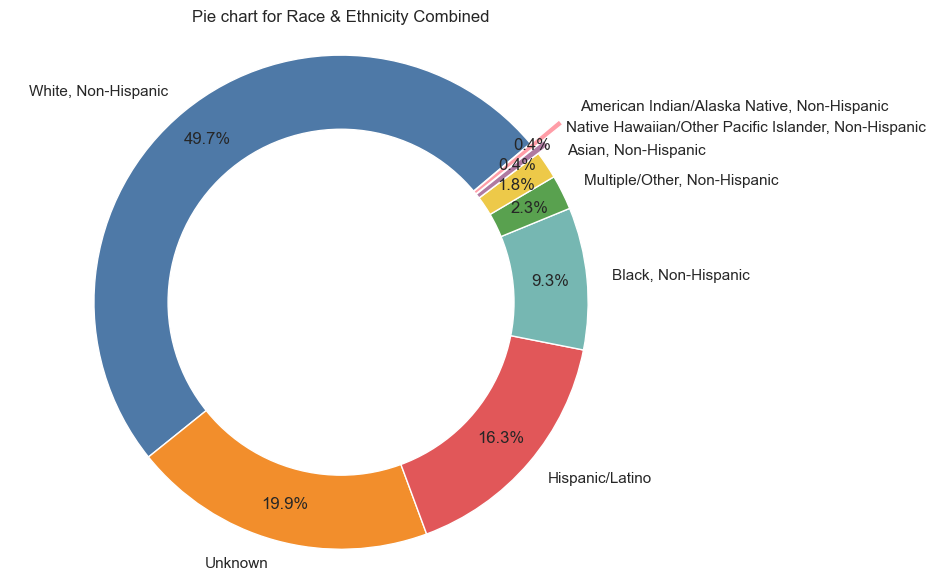

In [23]:
# Pie chart
labels = race_ethnicity_combined_proportion.keys()
sizes = race_ethnicity_combined_proportion
explode = (0,0,0,0,0,0,0.05,0.15)

fig11, ax11 = plt.subplots()
ax11.set_title('Pie chart for Race & Ethnicity Combined')
ax11.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=40,
        pctdistance=0.85,
        explode=explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig11 = plt.gcf()
fig11.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax11.axis('equal') 
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.show()

### Bivariate

In [24]:
df_race_ethnicity_combined_bivariate = pd.concat([y_train, X_train['race_ethnicity_combined']],axis=1)

ct21 = pd.crosstab(df_race_ethnicity_combined_bivariate['race_ethnicity_combined'],
                  df_race_ethnicity_combined_bivariate['pna_yn'],
                  margins=False) 
ct21

pna_yn,No,Yes
race_ethnicity_combined,,
"American Indian/Alaska Native, Non-Hispanic",3556,343
"Asian, Non-Hispanic",16671,1695
"Black, Non-Hispanic",84152,10208
Hispanic/Latino,154475,10743
"Multiple/Other, Non-Hispanic",21123,1984
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",4222,293
Unknown,189534,12018
"White, Non-Hispanic",473882,30325


<function matplotlib.pyplot.show(close=None, block=None)>

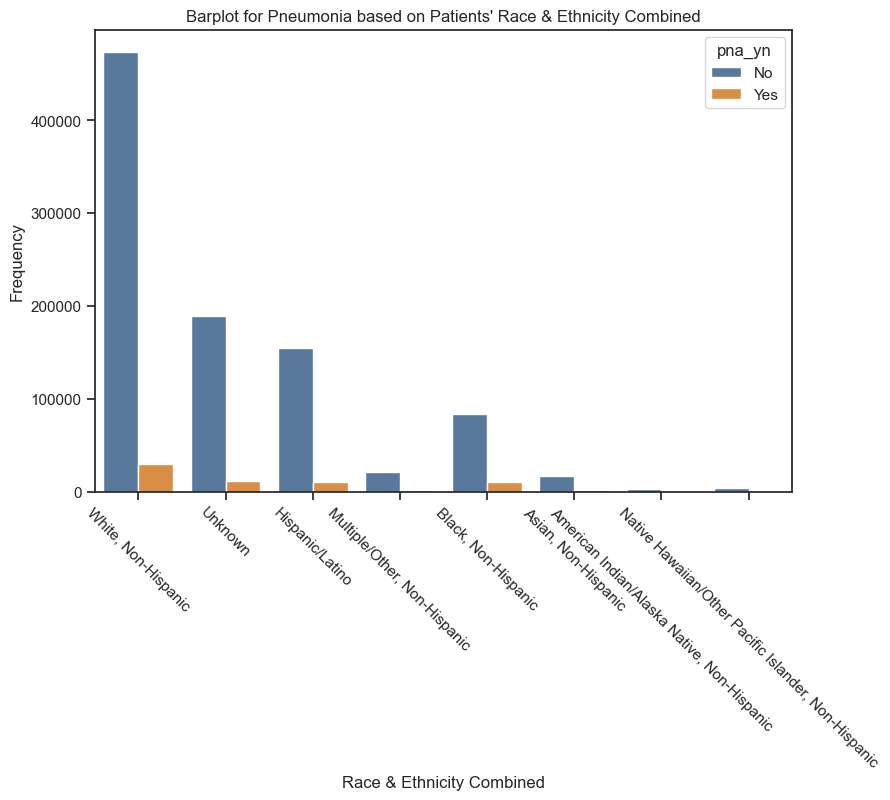

In [25]:
fig21, ax21 = plt.subplots()

sns.countplot(data=X_train, x='race_ethnicity_combined',
             hue=y_train)

ax21.set_title('Barplot for Pneumonia based on Patients\' Race & Ethnicity Combined')
plt.xticks(rotation=-45)
plt.xlabel('Race & Ethnicity Combined')
plt.ylabel('Frequency')
plt.savefig(f'Bivariate Race & Ethnicity Frequency')
plt.show

# note: this completed done after the bit with natsort

It seems that discriminating likelihood of obtaining pneumonia based on race & ethnicity combined would not be useful. This is because the frequency of pneumonia increases with the frequency of the race & ethnicity itself. Accordingly, the race & ethnicity of the patient does not seem to be a discriminating feature on whether they would obtain pneumonia, as they may all obtain it at a similar rate.

## Current status
### Univariate

In [26]:
X_train.columns[1]

'current_status'

In [27]:
current_status_proportion = X_train[X_train.columns[1]].value_counts(normalize=True)
len(current_status_proportion)

2

<function matplotlib.pyplot.show(close=None, block=None)>

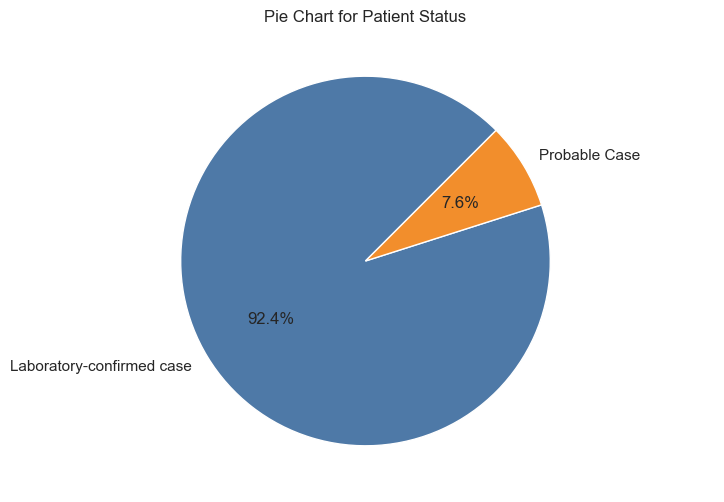

In [28]:
fig, ax12 = plt.subplots()
ax12.set_title('Pie Chart for Patient Status')
ax12.axis('equal')
plt.pie(x=current_status_proportion,
        labels=current_status_proportion.keys(),
        explode=(0, 0),
        autopct='%.1f%%',
        startangle=45)
plt.savefig(f'Current Status Pie Chart')
plt.show

### Bivariate

In [29]:
df_current_status_bivariate = pd.concat([y_train, X_train['current_status']],axis=1)

ct22 = pd.crosstab(df_current_status_bivariate['current_status'],
                  df_current_status_bivariate['pna_yn'],
                  margins=False) 
ct22

pna_yn,No,Yes
current_status,,
Laboratory-confirmed case,872970,65234
Probable Case,74645,2375


<function matplotlib.pyplot.show(close=None, block=None)>

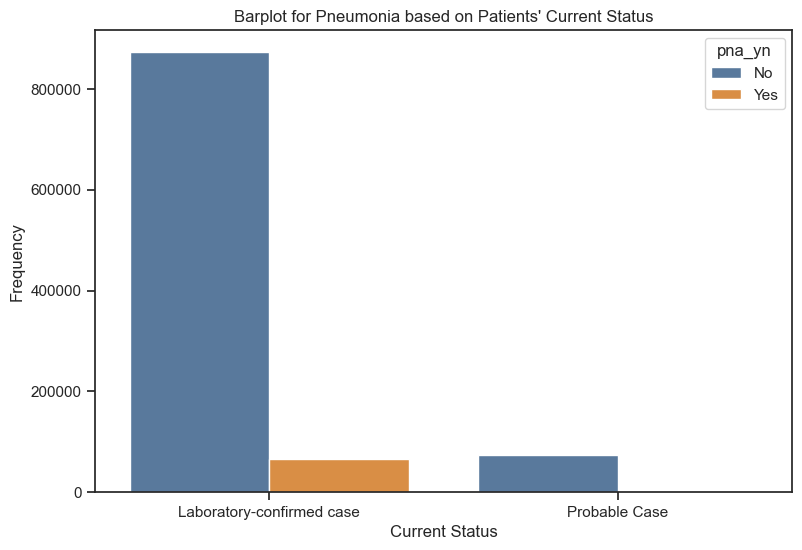

In [30]:
fig22, ax22 = plt.subplots()

sns.countplot(data=X_train, x='current_status',
             hue=y_train)

ax22.set_title('Barplot for Pneumonia based on Patients\' Current Status')
# plt.xticks(rotation=-45)
plt.xlabel('Current Status')
plt.ylabel('Frequency')
plt.savefig(f'Current Status Frequency')
plt.show

It seems that only laboratory-confirmed cases contains patients that has pneumonia. This feature is likely to be a good predictor for pneumonia.

In [31]:
def bivariate_crosstab(label):
    df_label_bivariate = pd.concat([y_train, X_train[f'{label}']],axis=1)

    ct = pd.crosstab(df_label_bivariate[f'{label}'],
                      df_label_bivariate['pna_yn'],
                      margins=True) 
    return ct


def bivariate_countplot(label):
    fig, ax = plt.subplots()

    sns.countplot(data=X_train, x=f'{label}',
                 hue=y_train)

    ax.set_title(f'Barplot for Pneumonia based on Patients\' {label.replace("_", " ").capitalize()}')
#     plt.xticks(rotation=-45)
    plt.xlabel(f'{label.replace("_", " ").capitalize()}')
    plt.ylabel('Frequency')
    plt.savefig(f'Bivariate {label.replace("_", " ").capitalize()} Frequency')
    plt.show

In [32]:
# bivariate_crosstab('current_status')

In [33]:
# bivariate_countplot('current_status')

## Sex
### Univariate

In [34]:
sex_proportion = X_train[X_train.columns[2]].value_counts(normalize=True)
sex_proportion

Female     0.533824
Male       0.458397
Unknown    0.007768
Other      0.000011
Name: sex, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

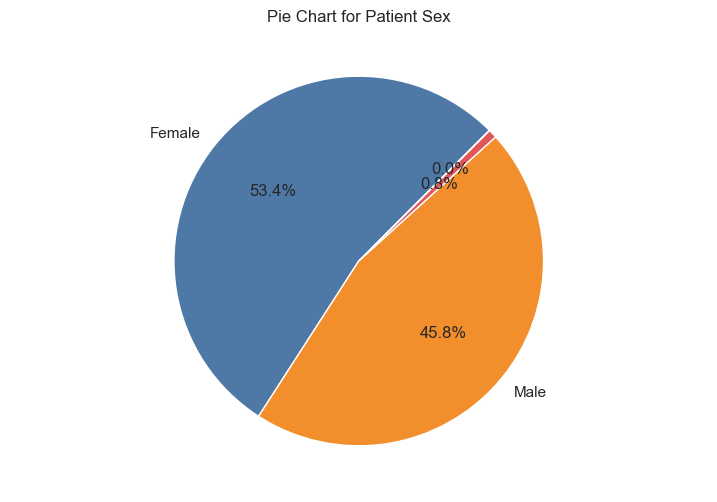

In [35]:
fig13, ax13 = plt.subplots()
ax13.set_title('Pie Chart for Patient Sex')
ax13.axis('equal')
plt.pie(x=sex_proportion,
        labels=['Female','Male','',''],
        explode=(0, 0.0, 0, 0.1),
        autopct='%.1f%%',
        startangle=45)
plt.show

Text(0.5, 1.0, 'Bar Chart for Patient Sex')

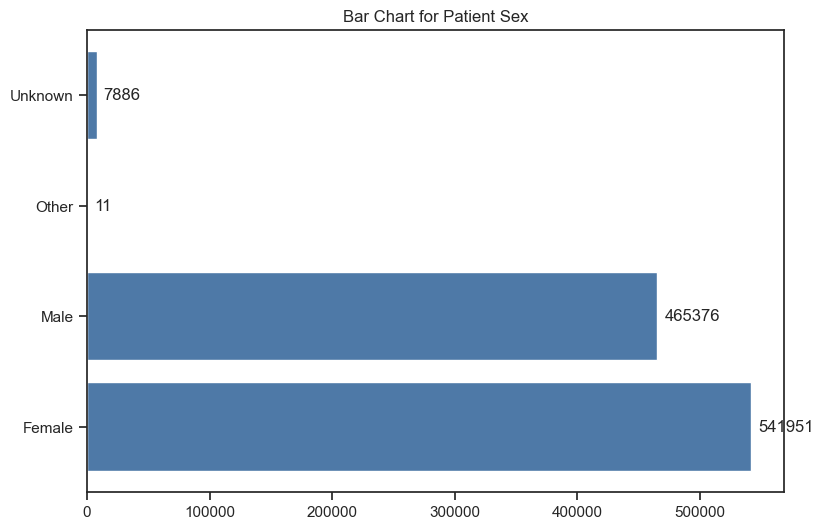

In [36]:
#create frequency table
sex_tab = pd.crosstab(index = X_train['sex'],
                     columns='count')

# #plot bar graph
# plt.title('Pie Chart for Patient Sex')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.bar(sex_tab.index, sex_tab.iloc[:,0])

#plot bar graph that can auto-label bars (https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh)
fig13, ax13 = plt.subplots()
bars = ax13.barh(sex_tab.index, sex_tab.iloc[:,0])
ax13.bar_label(bars, padding=5)
plt.title('Bar Chart for Patient Sex')

### Bivariate

In [37]:
ct_sex = bivariate_crosstab('sex')
ct_sex

pna_yn,No,Yes,All
sex,,,
Female,510266,31685,541951
Male,430164,35212,465376
Other,11,0,11
Unknown,7174,712,7886
All,947615,67609,1015224


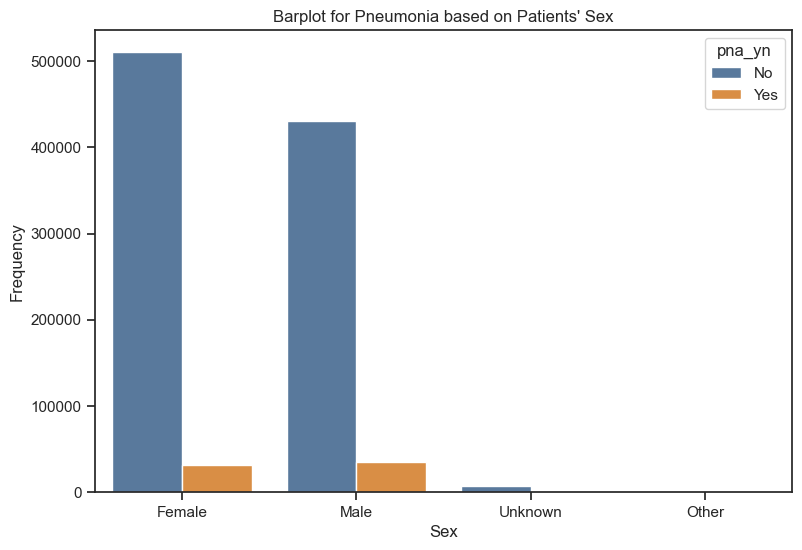

In [38]:
bivariate_countplot('sex')

In [39]:
pna_when_f = 31685/541951
pna_when_m = 35212/465376
print(f'the probability of pneumonia when female is {pna_when_f:.3f}.')
print(f'the probability of pneumonia when male is {pna_when_m:.3f}.')

the probability of pneumonia when female is 0.058.
the probability of pneumonia when male is 0.076.


Based on the conditional probability, it seems regardless of being female or male, the likely hood of obtaining pneumonia is relatively low. This variable seems to have a low predictive power; however, this dependence assumption needs to be tested for significance.

## Hospital (Y/N)
Whether patients was hospitalized

### Univariate

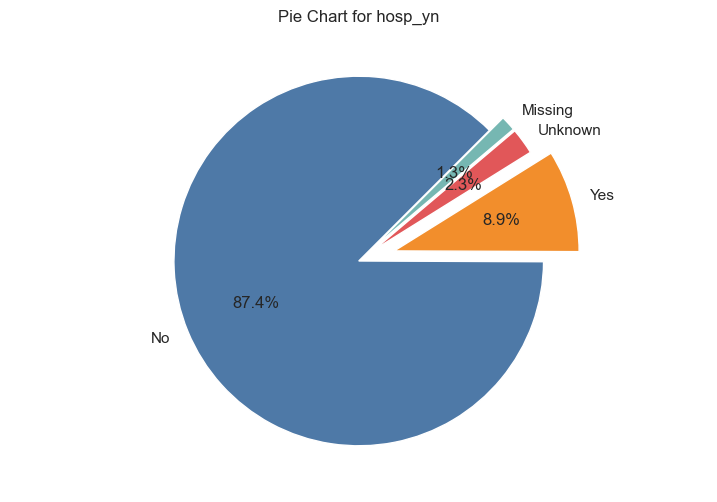

In [26]:
univariate_pie('hosp_yn', explode=(0, 0.2, 0.1, 0.1))

pna_yn       No    Yes      All
hosp_yn                        
Missing   12756    709    13465
No       871432  16243   887675
Unknown   21949   1359    23308
Yes       41478  49298    90776
All      947615  67609  1015224


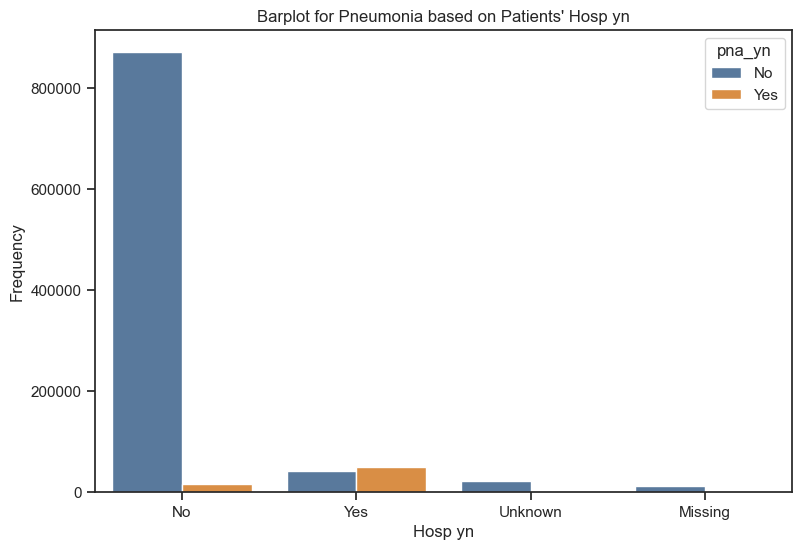

In [34]:
ct = bivariate_crosstab('hosp_yn')
print(ct)

bivariate_countplot('hosp_yn')

In [40]:
hosp_proportion = X_train[X_train.columns[3]].value_counts(normalize=True)
hosp_proportion

No         0.874364
Yes        0.089415
Unknown    0.036222
Name: hosp_yn, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

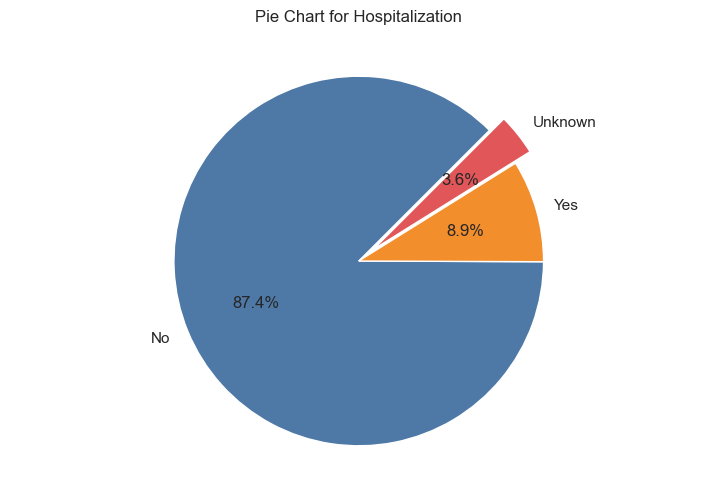

In [41]:
fig14, ax14 = plt.subplots()
ax14.set_title('Pie Chart for Hospitalization')
ax14.axis('equal')
plt.pie(x=hosp_proportion,
        labels=hosp_proportion.index,
        explode=(0, 0.0, 0.1),
        autopct='%.1f%%',
        startangle=45)
plt.show

### Bivariate

In [42]:
ct_sex = bivariate_crosstab('hosp_yn')
ct_sex

pna_yn,No,Yes,All
hosp_yn,,,
No,871432,16243,887675
Unknown,34705,2068,36773
Yes,41478,49298,90776
All,947615,67609,1015224


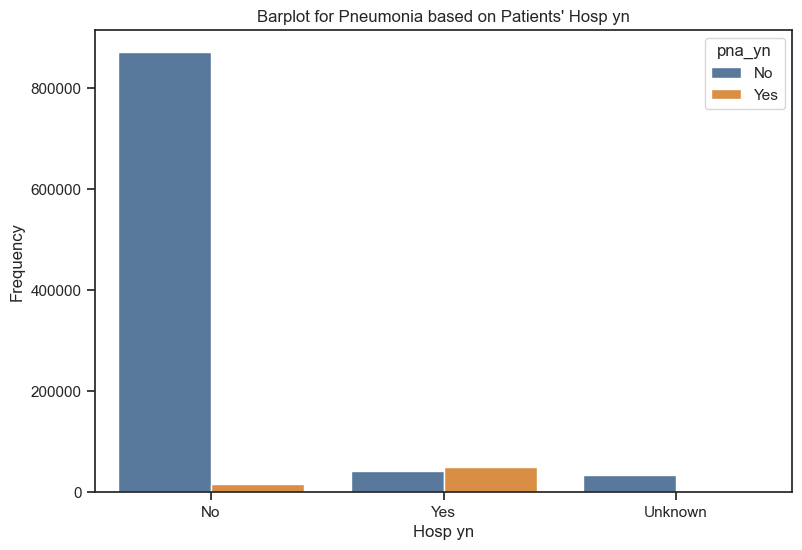

In [43]:
bivariate_countplot('hosp_yn')

Whether patients are hospitalized seems to be a good predictor of pneumonia. This is because a high proportion of patients hospitalized having pneumonia, while only a small proportion of patients with pneumonia are not hospitalized. This makes sense as only those with severe covid are hospitalized. As most COVID pneumonia tend to be severe, those with the disease tend to be hospitalized. For this reason, this predictor is removed to prevent target leakage. 

### hosp_yn vs current_status
Check whether current status has correlation with hospitalization

This is because if a patient is laboratory confirmed to exhibit covid, there is a greater likely hood that they will be hospitalized

In [44]:
#crosstab between current_status and hosp_yn
ct = pd.crosstab(index=X_train['current_status'],
                 columns=X_train['hosp_yn'])
print(f'Crosstab between hosp_yn and current_status: \n \n', ct)
print()

Crosstab between hosp_yn and current_status: 
 
 hosp_yn                        No  Unknown    Yes
current_status                                   
Laboratory-confirmed case  816438    33789  87977
Probable Case               71237     2984   2799



Assumptions of Chi-Square Test
1. Both varaibles are categorical - yes
2. All observations are independent - assume yes
3. Cells are mutually exclusive - Yes, execpt for unknown
4. Expected value of cells should be 5 or greater in at least 80% of cells - Yes check below

In [45]:
# importing the required function
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Performing Chi-sq test
stat, p, dof, expected = chi2_contingency(ct)
print('H0: The variables are not correlated with each other.')
print('H1: The variables are correlated with each other.')
print()

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print(f'The P-Value of the ChiSq Test is: {p}')

H0: The variables are not correlated with each other.
H1: The variables are correlated with each other.

The P-Value of the ChiSq Test is: 0.0


In [46]:
print('dof=%d' % dof)
print(expected)
print()

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print()

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[820331.50880988  33983.21522344  83889.27596668]
 [ 67343.49119012   2789.78477656   6886.72403332]]

probability=0.950, critical=5.991, stat=2883.734
Dependent (reject H0)

significance=0.050, p=0.000
Dependent (reject H0)


Since the p_value is less than 0.05, H0 was rejected. This means that the two variables are correlated with each other and will likely cause multi collinearity

In [47]:
def cat_corr(predictor1, predictor2):
    #crosstab between current_status and hosp_yn
    ct = pd.crosstab(index=predictor1,
                     columns=predictor2)
    print(f'Crosstab between hosp_yn and current_status: \n \n', ct)
    print()

    # importing the required function
    from scipy.stats import chi2_contingency

    # Performing Chi-sq test
    stat, p, dof, expected = chi2_contingency(ct)
    print('H0: The variables are not correlated with each other.')
    print('H1: The variables are correlated with each other.')
    print()

    # P-Value is the Probability of H0 being True
    # If P-Value&gt;0.05 then only we Accept the assumption(H0)
    print(f'The P-Value of the ChiSq Test is: {p}')
    print()
    
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
    return stat, p, dof, expected

Try without 'Unknown' class

In [48]:
X_train_nan = X_train[X_train.apply(lambda x: x != 'Unknown')]
X_train_no_nan = X_train_nan.dropna()
print(X_train_no_nan.shape)
n_nan_removed = X_train_no_nan.shape[0]

pred1 = X_train_no_nan['current_status']
pred2 = X_train_no_nan['hosp_yn']

(122042, 27)


In [49]:
cat_corr(pred1, pred2)

Crosstab between hosp_yn and current_status: 
 
 hosp_yn                        No   Yes
current_status                         
Laboratory-confirmed case  100940  7920
Probable Case               12878   304

H0: The variables are not correlated with each other.
H1: The variables are correlated with each other.

The P-Value of the ChiSq Test is: 2.6219028025306063e-102

significance=0.050, p=0.000
Dependent (reject H0)


(461.2098094155048,
 2.6219028025306063e-102,
 1,
 array([[101524.29065404,   7335.70934596],
        [ 12293.70934596,    888.29065404]]))

Even with the 'Unknown' class removed, current_status and hosp_yn are significantly correlated, X2({{dof}}, N={{n_nan_removed}}) = {{stat}}, p={{p}}.

## Age group
### Univariate

<function matplotlib.pyplot.show(close=None, block=None)>

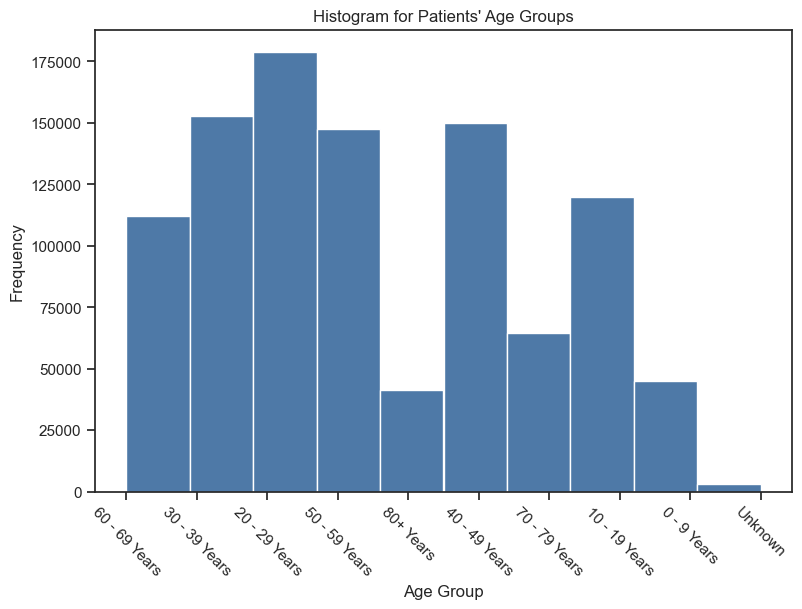

In [50]:
fig16, ax16 = plt.subplots()
ax16.set_title('Histogram for Patients\' Age Groups')
plt.hist(X_train['age_group'])
plt.xticks(rotation=-45)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

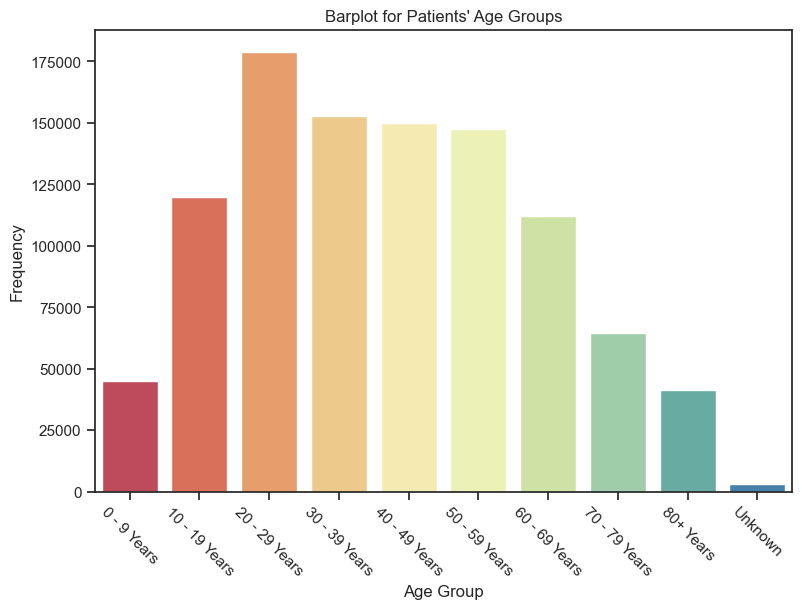

In [51]:
# X_train['age_group'].unique()
# sns.color_palette('Spectral')

age_bins = ['0 - 9 Years',
        '10 - 19 Years',
        '20 - 29 Years',
        '30 - 39 Years',
        '40 - 49 Years',
        '50 - 59 Years',
        '60 - 69 Years',
        '70 - 79 Years',
        '80+ Years',
        'Unknown']

fig16, ax16 = plt.subplots()

sns.countplot(data=X_train, x='age_group',
             order=age_bins,
             palette='Spectral')

ax16.set_title('Barplot for Patients\' Age Groups')
plt.xticks(rotation=-45)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.savefig('Age Group Frequency')
plt.show

# note: this completed done after the bit with natsort

### Bivariate

In [52]:
df_age_group_bivariate = pd.concat([y_train, X_train['age_group']],axis=1)

ct26 = pd.crosstab(df_age_group_bivariate['age_group'],
                  df_age_group_bivariate['pna_yn'],
                  margins=False) 
ct26

pna_yn,No,Yes
age_group,,
0 - 9 Years,44615,170
10 - 19 Years,119024,637
20 - 29 Years,176389,2645
30 - 39 Years,147687,5061
40 - 49 Years,141819,8163
50 - 59 Years,135661,11950
60 - 69 Years,98192,13843
70 - 79 Years,51712,12990
80+ Years,29625,11847


<function matplotlib.pyplot.show(close=None, block=None)>

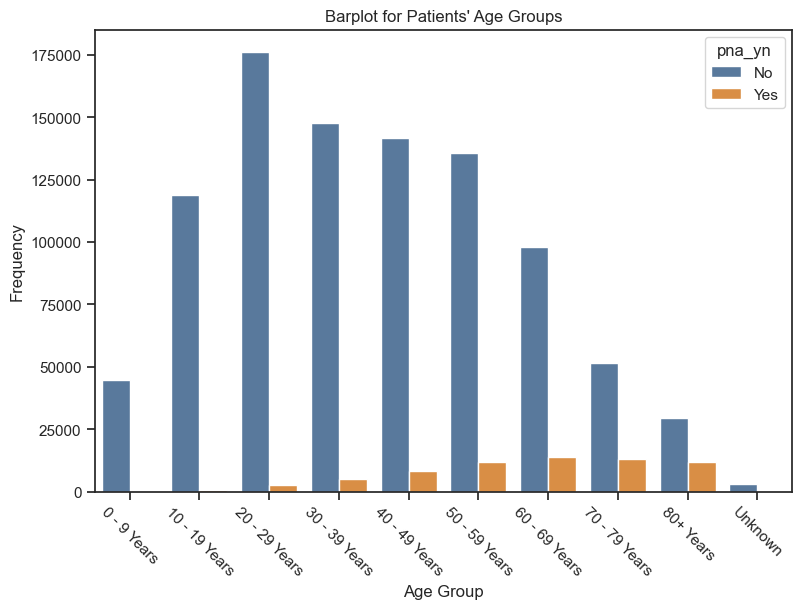

In [53]:
age_bins = ['0 - 9 Years',
        '10 - 19 Years',
        '20 - 29 Years',
        '30 - 39 Years',
        '40 - 49 Years',
        '50 - 59 Years',
        '60 - 69 Years',
        '70 - 79 Years',
        '80+ Years',
        'Unknown']

fig26, ax26 = plt.subplots()

sns.countplot(data=X_train, x='age_group',
             order=age_bins,
             hue=y_train)

ax26.set_title('Barplot for Patients\' Age Groups')
plt.xticks(rotation=-45)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.savefig('Bivariate Age Group Frequency')
plt.show

The rate of patients obtaining pneumonia increases with age, despite patient being normally distributed in age.

## County FIPS Code
https://blog.plotly.com/post/174174340512/what-is-a-fips-code-county-level-charts-in-python

FIPS codes are five-digit codes that are assigned to each U.S. county.The first two digits identify the state and the last three identify the county.

### Univariate

Chloropleth: https://towardsdatascience.com/using-fips-to-visualize-in-plotly-14fa7a6ddcf0

## County of Residence
### Univariate

## Correlation Analysis

### Chi-Squared test of independence

In [155]:
from itertools import product
import scipy.stats as ss

df_cat = X_train

In [156]:
## Removing records with at least one null value in a row
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(1015224, 27)

In [157]:
## Let us split this list into two parts
cat_var1 = ('race_ethnicity_combined', 'current_status', 'sex',
            'hosp_yn', 'icu_yn', 'death_yn', 'hc_work_yn', 
            'abxchest_yn', 'acuterespdistress_yn', 'mechvent_yn', 
            'fever_yn', 'sfever_yn', 'chills_yn')
cat_var2 = ('myalgia_yn', 'runnose_yn', 'sthroat_yn', 'cough_yn',
            'sob_yn', 'nauseavomit_yn', 'headache_yn', 'abdom_yn',
            'diarrhea_yn', 'medcond_yn', 'county_fips_code',
            'res_county', 'res_state', 'age_group')

## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [158]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []

for i in cat_var_prod:

    if i[0] != i[1]:
        result.append((i[0], i[1],
                       list(ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))

In [159]:
result

[('race_ethnicity_combined', 'myalgia_yn', 0.0),
 ('race_ethnicity_combined', 'runnose_yn', 0.0),
 ('race_ethnicity_combined', 'sthroat_yn', 0.0),
 ('race_ethnicity_combined', 'cough_yn', 0.0),
 ('race_ethnicity_combined', 'sob_yn', 0.0),
 ('race_ethnicity_combined', 'nauseavomit_yn', 0.0),
 ('race_ethnicity_combined', 'headache_yn', 0.0),
 ('race_ethnicity_combined', 'abdom_yn', 0.0),
 ('race_ethnicity_combined', 'diarrhea_yn', 0.0),
 ('race_ethnicity_combined', 'medcond_yn', 0.0),
 ('race_ethnicity_combined', 'county_fips_code', 0.0),
 ('race_ethnicity_combined', 'res_county', 0.0),
 ('race_ethnicity_combined', 'res_state', 0.0),
 ('race_ethnicity_combined', 'age_group', 0.0),
 ('current_status', 'myalgia_yn', 2.0568182235816803e-211),
 ('current_status', 'runnose_yn', 8.939871653469745e-98),
 ('current_status', 'sthroat_yn', 1.211202269998344e-255),
 ('current_status', 'cough_yn', 4.388477897741866e-220),
 ('current_status', 'sob_yn', 0.0),
 ('current_status', 'nauseavomit_yn', 0.0)

In [160]:
chi_test_output = pd.DataFrame(result,
                               columns = ['var1', 'var2',
                                          'coeff'])

## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,abdom_yn,age_group,cough_yn,county_fips_code,diarrhea_yn,headache_yn,medcond_yn,myalgia_yn,nauseavomit_yn,res_county,res_state,runnose_yn,sob_yn,sthroat_yn
var1,,,,,,,,,,,,,,
abxchest_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
acuterespdistress_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
chills_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
current_status,0.0,3.677917e-253,4.388478e-220,0.0,0.0,0.0,0.000000e+00,2.056818e-211,0.0,0.0,0.0,8.939872e-98,0.000000e+00,1.211202e-255
death_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
fever_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
hc_work_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.512579e-287,0.000000e+00,0.000000e+00
hosp_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
icu_yn,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


Since there exists a relationship between two variables if p value ≤ 0.05, all variables have significant relationship between each other...

Important to note that the sample size might be too large to make meaningful use of p-value. Morevoer, the predictors tend exhibit unbalanced classes.

### Chi-Squared test of independence 2 ('Unknown' class Removed)

In [161]:
from itertools import product
import scipy.stats as ss

df_cat = X_train_no_nan

In [162]:
## Removing records with at least one null value in a row
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(122042, 27)

In [163]:
## Let us split this list into two parts
cat_var1 = ('race_ethnicity_combined', 'current_status', 'sex',
            'hosp_yn', 'icu_yn', 'death_yn', 'hc_work_yn', 
            'abxchest_yn', 'acuterespdistress_yn', 'mechvent_yn', 
            'fever_yn', 'sfever_yn', 'chills_yn')
cat_var2 = ('myalgia_yn', 'runnose_yn', 'sthroat_yn', 'cough_yn',
            'sob_yn', 'nauseavomit_yn', 'headache_yn', 'abdom_yn',
            'diarrhea_yn', 'medcond_yn', 'county_fips_code',
            'res_county', 'res_state', 'age_group')

## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [164]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []

for i in cat_var_prod:

    if i[0] != i[1]:
        result.append((i[0], i[1],
                       list(ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))

In [165]:
result

[('race_ethnicity_combined', 'myalgia_yn', 2.620771071615886e-36),
 ('race_ethnicity_combined', 'runnose_yn', 7.525906731498253e-205),
 ('race_ethnicity_combined', 'sthroat_yn', 1.1552248203970078e-106),
 ('race_ethnicity_combined', 'cough_yn', 1.9995335236532704e-30),
 ('race_ethnicity_combined', 'sob_yn', 1.313370120587501e-41),
 ('race_ethnicity_combined', 'nauseavomit_yn', 7.050522430374957e-11),
 ('race_ethnicity_combined', 'headache_yn', 1.3951926831071888e-35),
 ('race_ethnicity_combined', 'abdom_yn', 5.219841906245124e-65),
 ('race_ethnicity_combined', 'diarrhea_yn', 1.458036348560151e-08),
 ('race_ethnicity_combined', 'medcond_yn', 8.086350022802399e-227),
 ('race_ethnicity_combined', 'county_fips_code', 0.0),
 ('race_ethnicity_combined', 'res_county', 0.0),
 ('race_ethnicity_combined', 'res_state', 0.0),
 ('race_ethnicity_combined', 'age_group', 0.0),
 ('current_status', 'myalgia_yn', 0.0007812974986269842),
 ('current_status', 'runnose_yn', 1.864837075623815e-52),
 ('current

In [166]:
chi_test_output = pd.DataFrame(result,
                               columns = ['var1', 'var2',
                                          'coeff'])

## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,abdom_yn,age_group,cough_yn,county_fips_code,diarrhea_yn,headache_yn,medcond_yn,myalgia_yn,nauseavomit_yn,res_county,res_state,runnose_yn,sob_yn,sthroat_yn
var1,,,,,,,,,,,,,,
abxchest_yn,7.212488e-65,0.000000e+00,1.280680e-168,0.000000e+00,7.730207e-85,1.159080e-50,0.000000e+00,4.659825e-07,2.443820e-78,0.000000e+00,0.000000e+00,7.921220e-82,0.000000e+00,3.182093e-44
acuterespdistress_yn,4.461501e-10,2.072662e-291,2.358239e-37,0.000000e+00,1.077084e-10,2.669589e-28,3.441842e-209,5.495193e-01,2.703790e-07,0.000000e+00,0.000000e+00,4.179607e-31,0.000000e+00,5.120395e-14
chills_yn,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.305060e-99,0.000000e+00,0.000000e+00,0.000000e+00,1.616353e-197,0.000000e+00,0.000000e+00,0.000000e+00
current_status,1.606628e-14,4.099943e-87,1.172929e-05,0.000000e+00,1.807678e-28,3.876935e-06,3.096146e-85,7.812975e-04,4.674906e-19,0.000000e+00,0.000000e+00,1.864837e-52,1.313984e-51,1.661155e-03
death_yn,2.469308e-08,0.000000e+00,3.104554e-09,1.090076e-306,4.462412e-17,3.767769e-262,0.000000e+00,5.186809e-111,1.558980e-12,2.441159e-265,1.691116e-202,1.133748e-118,2.372573e-124,1.017859e-95
fever_yn,3.478894e-230,9.062001e-174,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.007997e-52,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.566785e-01,0.000000e+00,2.132876e-110
hc_work_yn,1.986538e-07,0.000000e+00,1.046718e-32,0.000000e+00,4.503434e-14,5.378955e-108,3.169053e-03,2.604695e-80,2.450603e-57,0.000000e+00,0.000000e+00,1.508455e-36,1.938542e-52,1.253348e-43
hosp_yn,6.758841e-50,0.000000e+00,9.320708e-42,0.000000e+00,8.521250e-48,5.122716e-203,0.000000e+00,5.303808e-19,1.423381e-59,0.000000e+00,0.000000e+00,2.338014e-189,0.000000e+00,1.317180e-120
icu_yn,2.092690e-09,0.000000e+00,4.547647e-20,0.000000e+00,2.746695e-12,2.726525e-52,3.520894e-268,1.485563e-03,2.748480e-09,0.000000e+00,0.000000e+00,2.154698e-51,0.000000e+00,1.902585e-23


### Phik
https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

note: Another possible metric is Cramer's phi

In [170]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

ModuleNotFoundError: No module named 'phik'

In [ ]:
rep = report.correlation_report(train, significance_threshold=3, correlation_threshold=0.5)

In [ ]:
phik_overview = train.phik_matrix()
# phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

In [ ]:
significance_overview = train.significance_matrix()

plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

In [ ]:
var_1 = "primary_type"
var_2 = "secondary_type"

outlier_signifs, binning_dict = train[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))